In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

2024-11-27 13:12:23.778488: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-27 13:12:23.782927: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-27 13:12:23.796038: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-27 13:12:23.819009: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-27 13:12:23.825074: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-27 13:12:23.841817: I tensorflow/core/platform/cpu_feature_gu

# Creating the Model

In [2]:
def binarize(img):
    img = image.img_to_array(img, dtype='uint8')
    binarized = np.expand_dims(cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2), -1)
    inverted_binary_img = ~binarized
    return inverted_binary_img

In [5]:
data_dir = '../data'
batch_size = 32
img_height = 45
img_width = 45

In [6]:
import os

class_folders = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d)) and d != ".ipynb_checkpoints"]

train_generator = train_datagen.flow_from_directory(
        data_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode="categorical",
        seed=123,
        classes=class_folders)  # Specify valid classes

NameError: name 'train_datagen' is not defined

In [20]:
class_names = [k for k,v in train_generator.class_indices.items()]
class_names

['0', 'times', '1', '2', '3', '4', '5', '6', '7', '8', '9', '+', '-', '=']

In [21]:
num_classes = 14

model = tf.keras.Sequential([
  tf.keras.layers.Input((45, 45, 1)),
  tf.keras.layers.Rescaling(1./255), # originally tf.keras.layers.Rescaling
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [22]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)         │ (None, 45, 45, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 43, 43, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 21, 21, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 19, 19, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 9, 9, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 7, 7, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 14)             │         1,806 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57,614 (225.05 KB)

 Trainable params: 57,614 (225.05 KB)

 Non-trainable params: 0 (0.00 B)

# Model fitting

In [23]:
model.compile(
  optimizer='adam',
  loss=tf.losses.CategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [24]:
model.fit(
  train_generator,
  epochs=3
)

Epoch 1/3
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 32s 29ms/step - accuracy: 0.7808 - loss: 0.7229
Epoch 2/3
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 34s 31ms/step - accuracy: 0.9679 - loss: 0.1178
Epoch 3/3
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 32s 29ms/step - accuracy: 0.9783 - loss: 0.0771


# Drawing contours

In [30]:
image_dir = "automated_test_images/"

In [35]:
def getOverlap(a, b):
     return max(0, min(a[1], b[1]) - max(a[0], b[0]))
def detect_contours(img_path):
    # Given an image path, output bounding box coordinates of an image
    input_image = cv2.imread(img_path, 0) # Load a greyscale image
 
    # Make a copy to draw bounding box
    input_image_cpy = input_image.copy()

    # Convert the grayscale image to binary (image binarization opencv python), then invert
    binarized = cv2.adaptiveThreshold(input_image_cpy,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)
    inverted_binary_img = ~binarized

    # Detect contours
    # hierarchy variable contains information about the relationship between each contours
    contours_list, hierarchy = cv2.findContours(inverted_binary_img,
                                           cv2.RETR_TREE,
                                           cv2.CHAIN_APPROX_SIMPLE) # Find contours
    # Detect contours
    l = []
    for c in contours_list:
        x, y, w, h = cv2.boundingRect(c)
        l.append([x, y, w, h])
    # Check whether any overlapping rectangles. We do this in a way such that we only compare each box once with all other boxes.
    lcopy = l.copy()
    keep = []
    while len(lcopy) != 0:
        curr_x, curr_y, curr_w, curr_h = lcopy.pop(0) # Look at next box
        if curr_w * curr_h < 20: # remove very small boxes
            continue
        throw = []
        for i, (x, y, w, h) in enumerate(lcopy):
            curr_interval = [curr_x, curr_x+curr_w]
            next_interval = [x, x+w]
            if getOverlap(curr_interval, next_interval) > 1 : # more than 3 pixels overlap, this is arbitrary
                # Merge the two intervals
                new_interval_x = [min(curr_x, x), max(curr_x+curr_w, x+w)]
                new_interval_y = [min(curr_y, y), max(curr_y+curr_h, y+h)]
                newx, neww = new_interval_x[0], new_interval_x[1] - new_interval_x[0]
                newy, newh = new_interval_y[0], new_interval_y[1] - new_interval_y[0]
                curr_x, curr_y, curr_w, curr_h = newx, newy, neww, newh
                throw.append(i) # Mark this box to throw away later, since it has now been merged with current box
        for ind in sorted(throw, reverse=True): # Sort in reverse order otherwise we will pop incorrectly
            lcopy.pop(ind)
        keep.append([curr_x, curr_y, curr_w, curr_h]) # Keep the current box we are comparing against
    return keep

In [45]:
IMAGE = "2numbers_test_001.png"
img_path = "automated_test_images/"+IMAGE
input_image = cv2.imread(img_path, 0) 
input_image_cpy = input_image.copy()
keep = detect_contours(image_dir+IMAGE)

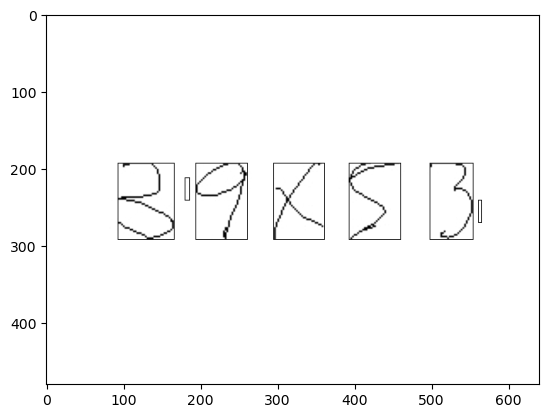

In [46]:
#Visualise how the bounding boxes look like
for (x, y, w, h) in keep:
    cv2.rectangle(input_image_cpy, (x, y), (x + w, y + h), (0, 0, 255), 1)
plt.imshow(input_image_cpy, cmap='gray')
plt.show()

# Evaluating Equations

In [40]:
def resize_pad(img, size, padColor=255):

    h, w = img.shape[:2]
    sh, sw = size

    # interpolation method
    if h > sh or w > sw: # shrinking image
        interp = cv2.INTER_AREA
    else: # stretching image
        interp = cv2.INTER_CUBIC

    # aspect ratio of image
    aspect = w/h  # if on Python 2, you might need to cast as a float: float(w)/h

    # compute scaling and pad sizing
    if aspect > 1: # horizontal image
        new_w = sw
        new_h = np.round(new_w/aspect).astype(int)
        pad_vert = (sh-new_h)/2
        pad_top, pad_bot = np.floor(pad_vert).astype(int), np.ceil(pad_vert).astype(int)
        pad_left, pad_right = 0, 0
    elif aspect < 1: # vertical image
        new_h = sh
        new_w = np.round(new_h*aspect).astype(int)
        pad_horz = (sw-new_w)/2
        pad_left, pad_right = np.floor(pad_horz).astype(int), np.ceil(pad_horz).astype(int)
        pad_top, pad_bot = 0, 0
    else: # square image
        new_h, new_w = sh, sw
        pad_left, pad_right, pad_top, pad_bot = 0, 0, 0, 0

    # set pad color
    if len(img.shape) is 3 and not isinstance(padColor, (list, tuple, np.ndarray)): # color image but only one color provided
        padColor = [padColor]*3

    # scale and pad
    scaled_img = cv2.resize(img, (new_w, new_h), interpolation=interp)
    scaled_img = cv2.copyMakeBorder(scaled_img, pad_top, pad_bot, pad_left, pad_right, borderType=cv2.BORDER_CONSTANT, value=padColor)

    return scaled_img

<>:33: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:33: SyntaxWarning: "is" with a literal. Did you mean "=="?
/var/tmp/ipykernel_3282929/2429988426.py:33: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if len(img.shape) is 3 and not isinstance(padColor, (list, tuple, np.ndarray)): # color image but only one color provided


In [44]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from skimage import io
from tqdm import tqdm

# Function to predict each symbol in the equation image
def predict_equation(model, img_path, class_names):
    # Load and binarize the image
    input_image = cv2.imread(img_path, 0)
    inverted_binary_img = binarize(input_image)
    
    # Detect contours and sort left-to-right
    bounding_boxes = detect_contours(img_path)
    bounding_boxes = sorted(bounding_boxes, key=lambda x: x[0])  # Sort symbols left-to-right
    
    # Predict symbols and reconstruct the equation string
    eqn_list = []
    for (x, y, w, h) in bounding_boxes:
        # Resize and pad each symbol for the model
        img = resize_pad(inverted_binary_img[y:y+h, x:x+w], (45, 45), 0)
        
        # Predict the symbol class
        pred_class = class_names[np.argmax(model.predict(tf.expand_dims(tf.expand_dims(img, 0), -1), verbose = 0))]
        
        # Map "times" to "*" for evaluation compatibility
        if pred_class == "times":
            pred_class = "*"
        eqn_list.append(pred_class)
    
    # Join symbols to form the full equation
    predicted_eqn = ''.join(eqn_list)
    return predicted_eqn

def evaluate_model_on_test_set(model, test_folder, answer_file, class_names):
    # Load true equations and answers from CSV
    answers_df = pd.read_csv(answer_file)
    true_equations = answers_df['Equation']
    true_answers = answers_df['Answer']
    
    # Initialize counters for accuracy
    correct_count = 0
    total_count = len(true_answers)
    
    # Use tqdm to create a progress bar
    for i, true_eqn in tqdm(enumerate(true_equations), total=total_count, desc="Evaluating images"):
        img_path = os.path.join(test_folder, f"2numbers_test_{str(i).zfill(3)}.png")
        
        # Predict the equation from the image
        predicted_eqn = predict_equation(model, img_path, class_names)
        
        # Evaluate the predicted equation string
        try:
            predicted_answer = eval(predicted_eqn)
        except Exception as e:
            predicted_answer = None

        # Get the true answer from the CSV file
        true_answer = true_answers[i]
        
        # Compare predicted answer with true answer
        if predicted_answer == true_answer:
            correct_count += 1
        else:
            # Only print mismatches
            print(f"Mismatch: Predicted {predicted_eqn}={predicted_answer}, True {true_eqn}={true_answer}")
    
    # Calculate and print final accuracy
    accuracy = correct_count / total_count
    print(f"Model Accuracy on Test Set: {accuracy * 100:.2f}%")
    return accuracy


# Run the evaluation
test_folder = "automated_test_images"
answer_file = "test_answers.csv"
accuracy = evaluate_model_on_test_set(model, test_folder, answer_file, class_names)


Evaluating images:   1%|          | 2/200 [00:01<02:28,  1.33it/s]

Mismatch: Predicted 329*53==None, True 39*53=2067


Evaluating images:   2%|▎         | 5/200 [00:03<02:15,  1.44it/s]

Mismatch: Predicted 3=0-98=None, True 30-98=-68


Evaluating images:   3%|▎         | 6/200 [00:04<02:17,  1.41it/s]

Mismatch: Predicted 67+146=213, True 67+14=81


Evaluating images:   4%|▎         | 7/200 [00:04<02:18,  1.39it/s]

Mismatch: Predicted 91+618=709, True 91+18=109


Evaluating images:   4%|▍         | 9/200 [00:06<02:04,  1.54it/s]

Mismatch: Predicted 327*2=654, True 27*2=54


Evaluating images:   6%|▋         | 13/200 [00:08<02:05,  1.49it/s]

Mismatch: Predicted 857*66=56562, True 57*66=3762


Evaluating images:   7%|▋         | 14/200 [00:09<02:07,  1.46it/s]

Mismatch: Predicted 249*19=4731, True 29*19=551


Evaluating images:   8%|▊         | 15/200 [00:10<02:07,  1.45it/s]

Mismatch: Predicted 42*123=5166, True 41*23=943


Evaluating images:   8%|▊         | 16/200 [00:10<02:10,  1.41it/s]

Mismatch: Predicted 414+90=504, True 41+90=131


Evaluating images:   8%|▊         | 17/200 [00:11<02:07,  1.43it/s]

Mismatch: Predicted 41+627=668, True 41+67=108


Evaluating images:   9%|▉         | 18/200 [00:12<02:15,  1.34it/s]

Mismatch: Predicted 158+888=1046, True 15+88=103


Evaluating images:  10%|█         | 20/200 [00:13<02:12,  1.36it/s]

Mismatch: Predicted 4591*7=32137, True 59*7=413


Evaluating images:  10%|█         | 21/200 [00:14<02:03,  1.45it/s]

Mismatch: Predicted 66-13=53, True 64-13=51


Evaluating images:  12%|█▏        | 23/200 [00:15<02:05,  1.41it/s]

Mismatch: Predicted 365-3*0=365, True 35-30=5


Evaluating images:  13%|█▎        | 26/200 [00:17<01:56,  1.49it/s]

Mismatch: Predicted 91*233=21203, True 21*23=483


Evaluating images:  14%|█▎        | 27/200 [00:18<02:03,  1.40it/s]

Mismatch: Predicted 26+166=192, True 16+16=32


Evaluating images:  16%|█▌        | 32/200 [00:21<01:32,  1.82it/s]

Mismatch: Predicted 3*7=21, True 32*7=224


Evaluating images:  16%|█▋        | 33/200 [00:21<01:39,  1.68it/s]

Mismatch: Predicted 68+194=262, True 68+19=87


Evaluating images:  19%|█▉        | 38/200 [00:24<01:23,  1.94it/s]

Mismatch: Predicted 277=277, True 0-77=-77


Evaluating images:  22%|██▏       | 43/200 [00:27<01:30,  1.73it/s]

Mismatch: Predicted 765+56=821, True 76+56=132


Evaluating images:  22%|██▏       | 44/200 [00:27<01:31,  1.71it/s]

Mismatch: Predicted 92-45=47, True 92-15=77


Evaluating images:  23%|██▎       | 46/200 [00:29<01:48,  1.42it/s]

Mismatch: Predicted 27+7878=7905, True 27+77=104


Evaluating images:  24%|██▎       | 47/200 [00:30<01:48,  1.42it/s]

Mismatch: Predicted 844+64=908, True 84+64=148


Evaluating images:  25%|██▌       | 50/200 [00:31<01:35,  1.57it/s]

Mismatch: Predicted 97*33=3201, True 97*3=291


Evaluating images:  26%|██▌       | 52/200 [00:33<01:29,  1.65it/s]

Mismatch: Predicted 39*91=3549, True 39*31=1209


Evaluating images:  27%|██▋       | 54/200 [00:34<01:34,  1.55it/s]

Mismatch: Predicted 95-645=-550, True 95-65=30


Evaluating images:  28%|██▊       | 55/200 [00:35<01:40,  1.44it/s]

Mismatch: Predicted 997*381=379857, True 99*31=3069


Evaluating images:  28%|██▊       | 57/200 [00:36<01:36,  1.49it/s]

Mismatch: Predicted 856*44=37664, True 86*44=3784


Evaluating images:  30%|███       | 60/200 [00:38<01:31,  1.53it/s]

Mismatch: Predicted 342+34=376, True 2+34=36


Evaluating images:  31%|███       | 62/200 [00:39<01:34,  1.45it/s]

Mismatch: Predicted 37-614=-577, True 37-64=-27


Evaluating images:  32%|███▏      | 64/200 [00:41<01:29,  1.53it/s]

Mismatch: Predicted 47*661=31067, True 47*64=3008


Evaluating images:  32%|███▎      | 65/200 [00:41<01:24,  1.59it/s]

Mismatch: Predicted 25-28=-3, True 75-28=47


Evaluating images:  33%|███▎      | 66/200 [00:41<01:13,  1.83it/s]

Mismatch: Predicted 4+6=10, True 4+26=30


Evaluating images:  34%|███▍      | 69/200 [00:43<01:21,  1.61it/s]

Mismatch: Predicted 682+96=778, True 18+96=114


Evaluating images:  36%|███▌      | 71/200 [00:45<01:18,  1.64it/s]

Mismatch: Predicted 56+82=138, True 56+87=143


Evaluating images:  36%|███▋      | 73/200 [00:46<01:23,  1.52it/s]

Mismatch: Predicted 966+729=1695, True 96+29=125


Evaluating images:  37%|███▋      | 74/200 [00:47<01:24,  1.49it/s]

Mismatch: Predicted 528-66=462, True 58-66=-8


Evaluating images:  38%|███▊      | 76/200 [00:48<01:17,  1.59it/s]

Mismatch: Predicted 214*4=856, True 21*4=84


Evaluating images:  39%|███▉      | 78/200 [00:49<01:08,  1.77it/s]

Mismatch: Predicted -+14=-14, True 1+13=14


Evaluating images:  40%|███▉      | 79/200 [00:50<01:15,  1.60it/s]

Mismatch: Predicted 648+65=713, True 64+65=129


Evaluating images:  40%|████      | 80/200 [00:50<01:13,  1.62it/s]

Mismatch: Predicted 372+0=372, True 37+0=37


Evaluating images:  40%|████      | 81/200 [00:51<01:15,  1.58it/s]

Mismatch: Predicted 468*22=10296, True 48*22=1056


Evaluating images:  41%|████      | 82/200 [00:51<01:12,  1.63it/s]

Mismatch: Predicted 140+6=146, True 10+6=16


Evaluating images:  42%|████▏     | 84/200 [00:53<01:17,  1.49it/s]

Mismatch: Predicted 8381*32=268192, True 31*32=992


Evaluating images:  44%|████▎     | 87/200 [00:55<01:20,  1.41it/s]

Mismatch: Predicted 260-1749=-1489, True 20-19=1


Evaluating images:  44%|████▍     | 88/200 [00:56<01:15,  1.48it/s]

Mismatch: Predicted 75*89=6675, True 75*9=675


Evaluating images:  44%|████▍     | 89/200 [00:56<01:14,  1.49it/s]

Mismatch: Predicted 714+20=734, True 71+20=91


Evaluating images:  46%|████▋     | 93/200 [00:58<01:01,  1.73it/s]

Mismatch: Predicted 54*47=2538, True 54*7=378


Evaluating images:  48%|████▊     | 95/200 [01:00<01:00,  1.73it/s]

Mismatch: Predicted 2+448=450, True 2+44=46


Evaluating images:  48%|████▊     | 97/200 [01:01<00:58,  1.75it/s]

Mismatch: Predicted 39887=39887, True 39+87=126


Evaluating images:  49%|████▉     | 98/200 [01:01<01:01,  1.66it/s]

Mismatch: Predicted 910-67=843, True 90-67=23


Evaluating images:  50%|████▉     | 99/200 [01:02<01:08,  1.48it/s]

Mismatch: Predicted 7=5*3*4=None, True 75*34=2550


Evaluating images:  50%|█████     | 100/200 [01:03<01:07,  1.48it/s]

Mismatch: Predicted 53+852=905, True 53+52=105


Evaluating images:  52%|█████▏    | 103/200 [01:05<01:05,  1.49it/s]

Mismatch: Predicted 667+140=807, True 67+10=77


Evaluating images:  52%|█████▎    | 105/200 [01:06<01:00,  1.57it/s]

Mismatch: Predicted 922*61=56242, True 92*61=5612


Evaluating images:  53%|█████▎    | 106/200 [01:07<01:04,  1.45it/s]

Mismatch: Predicted 2477+52=2529, True 27+52=79


Evaluating images:  54%|█████▎    | 107/200 [01:07<01:02,  1.50it/s]

Mismatch: Predicted 2=*89=None, True 2*89=178


Evaluating images:  54%|█████▍    | 108/200 [01:08<00:55,  1.67it/s]

Mismatch: Predicted 5929=5929, True 59*9=531


Evaluating images:  55%|█████▍    | 109/200 [01:09<01:05,  1.39it/s]

Mismatch: Predicted 487*5763=2806581, True 87*56=4872


Evaluating images:  55%|█████▌    | 110/200 [01:09<01:00,  1.49it/s]

Mismatch: Predicted 80+40=120, True 80+45=125


Evaluating images:  57%|█████▋    | 114/200 [01:12<00:58,  1.47it/s]

Mismatch: Predicted 438*487=213306, True 48*48=2304


Evaluating images:  57%|█████▊    | 115/200 [01:13<00:57,  1.47it/s]

Mismatch: Predicted 442+30=472, True 12+30=42


Evaluating images:  58%|█████▊    | 116/200 [01:13<00:57,  1.47it/s]

Mismatch: Predicted 12-618=-606, True 12-18=-6


Evaluating images:  60%|█████▉    | 119/200 [01:15<00:58,  1.38it/s]

Mismatch: Predicted 14+162=176, True 14+12=26


Evaluating images:  62%|██████▎   | 125/200 [01:19<00:47,  1.59it/s]

Mismatch: Predicted 69-631=-562, True 69-61=8


Evaluating images:  64%|██████▎   | 127/200 [01:20<00:49,  1.49it/s]

Mismatch: Predicted 65*4226=274690, True 65*26=1690


Evaluating images:  65%|██████▌   | 130/200 [01:22<00:47,  1.47it/s]

Mismatch: Predicted =398+55=None, True 39+55=94


Evaluating images:  68%|██████▊   | 135/200 [01:25<00:33,  1.93it/s]

Mismatch: Predicted 322=322, True 32+2=34


Evaluating images:  68%|██████▊   | 136/200 [01:26<00:36,  1.73it/s]

Mismatch: Predicted 18-550=-532, True 18-55=-37


Evaluating images:  69%|██████▉   | 138/200 [01:27<00:36,  1.69it/s]

Mismatch: Predicted 38-66=-28, True 34-66=-32


Evaluating images:  70%|███████   | 140/200 [01:28<00:31,  1.92it/s]

Mismatch: Predicted 6-2=4, True 6-72=-66


Evaluating images:  70%|███████   | 141/200 [01:28<00:32,  1.81it/s]

Mismatch: Predicted 07+48=None, True 27+48=75


Evaluating images:  72%|███████▏  | 143/200 [01:29<00:30,  1.85it/s]

Mismatch: Predicted 448*1=448, True 98*1=98


Evaluating images:  72%|███████▏  | 144/200 [01:30<00:35,  1.59it/s]

Mismatch: Predicted 747*85==None, True 77*85=6545


Evaluating images:  72%|███████▎  | 145/200 [01:31<00:36,  1.53it/s]

Mismatch: Predicted 655-87=568, True 15-87=-72


Evaluating images:  73%|███████▎  | 146/200 [01:32<00:34,  1.59it/s]

Mismatch: Predicted 51*84=4284, True 51*4=204


Evaluating images:  74%|███████▎  | 147/200 [01:32<00:34,  1.53it/s]

Mismatch: Predicted 91+984=1075, True 91+98=189


Evaluating images:  74%|███████▍  | 148/200 [01:33<00:34,  1.51it/s]

Mismatch: Predicted 941+44=985, True 91+54=145


Evaluating images:  74%|███████▍  | 149/200 [01:34<00:34,  1.47it/s]

Mismatch: Predicted 74+4=5=None, True 74+45=119


Evaluating images:  75%|███████▌  | 150/200 [01:34<00:32,  1.52it/s]

Mismatch: Predicted 87+24=111, True 27+24=51


Evaluating images:  76%|███████▌  | 151/200 [01:35<00:33,  1.48it/s]

Mismatch: Predicted 640+52=692, True 60+52=112


Evaluating images:  77%|███████▋  | 154/200 [01:37<00:30,  1.50it/s]

Mismatch: Predicted 343-97=246, True 34-97=-63


Evaluating images:  78%|███████▊  | 156/200 [01:38<00:29,  1.50it/s]

Mismatch: Predicted 21*140=2940, True 1*10=10


Evaluating images:  78%|███████▊  | 157/200 [01:39<00:27,  1.56it/s]

Mismatch: Predicted 38-74=-36, True 33-74=-41


Evaluating images:  79%|███████▉  | 158/200 [01:40<00:28,  1.48it/s]

Mismatch: Predicted 460-383=77, True 40-83=-43


Evaluating images:  80%|████████  | 160/200 [01:41<00:25,  1.59it/s]

Mismatch: Predicted 1-362=-361, True 1-32=-31


Evaluating images:  84%|████████▎ | 167/200 [01:45<00:21,  1.57it/s]

Mismatch: Predicted 61-1347=-1286, True 61-13=48


Evaluating images:  85%|████████▌ | 170/200 [01:47<00:19,  1.50it/s]

Mismatch: Predicted 621+574=1195, True 61+57=118


Evaluating images:  86%|████████▌ | 172/200 [01:49<00:26,  1.07it/s]

Mismatch: Predicted 284+3889333=68=None, True 2+9=11


Evaluating images:  86%|████████▋ | 173/200 [01:50<00:23,  1.13it/s]

Mismatch: Predicted 148-8=0=None, True 18-80=-62


Evaluating images:  88%|████████▊ | 175/200 [01:51<00:18,  1.34it/s]

Mismatch: Predicted 5-9208=-9203, True 5-90=-85


Evaluating images:  88%|████████▊ | 176/200 [01:52<00:16,  1.43it/s]

Mismatch: Predicted 23*73=1679, True 93*73=6789


Evaluating images:  88%|████████▊ | 177/200 [01:53<00:16,  1.37it/s]

Mismatch: Predicted 86*5424=466464, True 8*52=416


Evaluating images:  89%|████████▉ | 178/200 [01:53<00:16,  1.34it/s]

Mismatch: Predicted 5=8-619=None, True 58-19=39


Evaluating images:  90%|████████▉ | 179/200 [01:54<00:15,  1.37it/s]

Mismatch: Predicted 249-60=189, True 29-60=-31


Evaluating images:  91%|█████████ | 182/200 [01:56<00:11,  1.54it/s]

Mismatch: Predicted 556-72=484, True 55-72=-17


Evaluating images:  92%|█████████▏| 183/200 [01:56<00:10,  1.69it/s]

Mismatch: Predicted 1*43=43, True 1*33=33


Evaluating images:  93%|█████████▎| 186/200 [01:58<00:09,  1.53it/s]

Mismatch: Predicted 45*2838=127710, True 45*38=1710


Evaluating images:  94%|█████████▍| 188/200 [02:00<00:07,  1.55it/s]

Mismatch: Predicted 361+86=447, True 31+86=117


Evaluating images:  94%|█████████▍| 189/200 [02:00<00:07,  1.52it/s]

Mismatch: Predicted 84+984=1068, True 84+98=182


Evaluating images:  95%|█████████▌| 190/200 [02:01<00:06,  1.50it/s]

Mismatch: Predicted 11+864=875, True 11+86=97


Evaluating images:  96%|█████████▌| 192/200 [02:02<00:05,  1.53it/s]

Mismatch: Predicted 1867=16=None, True 86-16=70


Evaluating images:  97%|█████████▋| 194/200 [02:04<00:04,  1.47it/s]

Mismatch: Predicted 269-74==None, True 29-74=-45


Evaluating images:  98%|█████████▊| 195/200 [02:04<00:03,  1.48it/s]

Mismatch: Predicted 57+216=273, True 57+21=78


Evaluating images:  99%|█████████▉| 198/200 [02:06<00:01,  1.56it/s]

Mismatch: Predicted 73=*47=None, True 73*67=4891


Evaluating images: 100%|██████████| 200/200 [02:07<00:00,  1.57it/s]

Mismatch: Predicted 6=9+456=None, True 69+56=125
Model Accuracy on Test Set: 47.00%
